In [1]:
import pandas as pd

## Importing datasets

In [2]:
df_cct = pd.read_csv("D:\Statap\data\credit_card_transactions-ibm_v2.csv")
df_cards = pd.read_csv("D:\Statap\data\sd254_cards.csv")
df_users = pd.read_csv("D:\Statap\data\sd254_users.csv")
df_cctu0 = pd.read_csv(r"D:\Statap\data\User0_credit_card_transactions.csv")


In [3]:
#dropping $ sign in "Amount"
df_cct["Amount"] = df_cct["Amount"].str.replace("$","")
df_cct

<ipython-input-3-4a613f03817d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cct["Amount"] = df_cct["Amount"].str.replace("$","")


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [4]:
#converting "Amount" in float
df_cct["Amount"] = df_cct["Amount"].astype(float)

## General description of the dataset

In [5]:
n_unique_users = df_cct["User"].nunique() # => 2,000 unique users
n_unique_cards = df_cct["Card"].nunique() # => 9 unique cards, annotated with numbers
n_unique_mc = df_cct["Merchant City"].nunique() # => 13,429 unique merchant cities, including 'ONLINE' / no nan value


In [6]:
max_amount = df_cct["Amount"].max() # => 12 390.5$
min_amount = df_cct["Amount"].min() # => -500.0$
mean_amount = df_cct["Amount"].mean() # => 43.63400502564106$

## Focusing on frauds only

In [7]:
df_fraud = df_cct[df_cct["Is Fraud?"]=="Yes"] # => 29,757 frauds out of 24,386,900 transactions
n_fraud_users = df_fraud["User"].nunique() # => 1343 different fraud users

In [8]:
#Statistics on the amount of fraud transactions:

mean_fraud_amount = df_fraud["Amount"].mean() # => 108.5908737439926$
min_fraud_amount = df_fraud["Amount"].min() # => -500.0$
max_fraud_amount = df_fraud["Amount"].max() # => 5694.44

In [9]:
#Locating frauds' cities:
city = df_fraud.groupby("Merchant City").size().index
n_fraud = df_fraud.groupby("Merchant City").size().values

df_fraud_city = pd.DataFrame({"City" : city , "Number of frauds" : n_fraud}).sort_values("Number of frauds", ascending = False).reset_index(drop = True)

#Computing percentages of frauds for each city:
df_fraud_city["Percentage of total frauds"] = df_fraud_city["Number of frauds"].apply(lambda x: (100*x)/df_fraud_city['Number of frauds'].sum())

# => Most frauds happen online. 15% of frauds come from Rome.
df_fraud_city

,City,Number of frauds,Percentage of total frauds
0,ONLINE,18349,61.662802
1,Rome,4683,15.737474
2,Algiers,629,2.113788
3,Port au Prince,375,1.260208
4,Strasburg,322,1.082098
...,...,...,...
1968,Hoffman Estates,1,0.003361
1969,Hixson,1,0.003361
1970,Hillsdale,1,0.003361
1971,Hilbert,1,0.003361


In [10]:
fraudster = df_fraud.groupby("User").size().index
n_fraud2 = df_fraud.groupby("User").size().values

df_fraud_user = pd.DataFrame({"Fraudster" : fraudster , "Number of frauds" : n_fraud2}).sort_values("Number of frauds", ascending = False).reset_index(drop = True)
# => outputs the number of frauds per fraudster
df_fraud_user

,Fraudster,Number of frauds
0,1064,113
1,1487,110
2,1425,100
3,1604,90
4,1019,88
...,...,...
1338,1912,1
1339,988,1
1340,1030,1
1341,222,1


In [11]:
fraud_user = df_cct[df_cct["User"].isin(fraudster)].groupby("User").size().index
n_trans_fraudster = df_cct[df_cct["User"].isin(fraudster)].groupby("User").size().values

df_fraudster_trans = pd.DataFrame({"Fraudster" : fraud_user , "Number of fraudster's total transactions" : n_trans_fraudster}).reset_index(drop = True)
# => outputs the number of total transaction per fraudster
df_fraudster_trans

,Fraudster,Number of fraudster's total transactions
0,0,19963
1,1,8919
2,2,41978
3,3,10117
4,4,18542
...,...,...
1338,1992,8461
1339,1993,10114
1340,1995,14713
1341,1996,18012


In [12]:
#Merging the previous two dataframes:
df_fraud2 = df_fraud_user.merge(df_fraudster_trans, left_on="Fraudster",right_on='Fraudster',how="left")
df_fraud2["Percentage frauds/total transactions"] = df_fraud2["Number of frauds"]/df_fraud2["Number of fraudster's total transactions"]
# => outputs all the fraudsters share of frauds/total transactions
df_fraud2

,Fraudster,Number of frauds,Number of fraudster's total transactions,Percentage frauds/total transactions
0,1064,113,43835,0.002578
1,1487,110,18923,0.005813
2,1425,100,22862,0.004374
3,1604,90,33079,0.002721
4,1019,88,34343,0.002562
...,...,...,...,...
1338,1912,1,6425,0.000156
1339,988,1,14358,0.000070
1340,1030,1,13653,0.000073
1341,222,1,15399,0.000065


## Analysis on life cycle

In [13]:
#Number of transactions per user:
user = df_cct.groupby("User").size().index
n_trans = df_cct.groupby("User").size().values

df_user = pd.DataFrame({"User": user, "Number of transactions": n_trans}).reset_index(drop=True)

# df_n_trans["Number of transactions"].mean() 
# => the average number of transactions per user is 12,193 transactions

In [14]:
df_user["Number of cards"] = df_cct[['User',"Card"]].drop_duplicates(keep='first').groupby("User").size().values

In [15]:
df_user["Number of cities"] = df_cct[['User',"Merchant City"]].drop_duplicates(keep='first').groupby("User").size().values

In [16]:
df_user["Average amount of transactions"] = df_cct.groupby('User')['Amount'].mean().values

In [17]:
df_user

,User,Number of transactions,Number of cards,Number of cities,Average amount of transactions
0,0,19963,5,295,81.299989
1,1,8919,5,263,81.118050
2,2,41978,5,314,35.159687
3,3,10117,4,392,117.277603
4,4,18542,1,402,97.011698
...,...,...,...,...,...
1995,1995,14713,3,180,23.714135
1996,1996,18012,4,279,41.056417
1997,1997,21607,3,298,32.636233
1998,1998,5782,1,211,58.956214


In [18]:
df_cctu0["Date"] = pd.DataFrame(df_cctu0.Year.astype(str) + '-' + df_cctu0.Month.astype(str))

In [19]:
df_cctu0

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,2002-9
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2002-9
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2002-9
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,2002-9
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,2002-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,13:03,$9.71,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Technical Glitch,No,2009-2
19959,0,4,2009,2,22,11:58,$27.94,Swipe Transaction,-8129520121141002186,La Verne,CA,91750.0,5211,NaN,No,2009-2
19960,0,4,2009,2,24,16:53,$13.97,Swipe Transaction,5474320255037684877,Hawthorne,CA,90250.0,5912,NaN,No,2009-2
19961,0,4,2009,3,29,16:30,$14.27,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No,2009-3


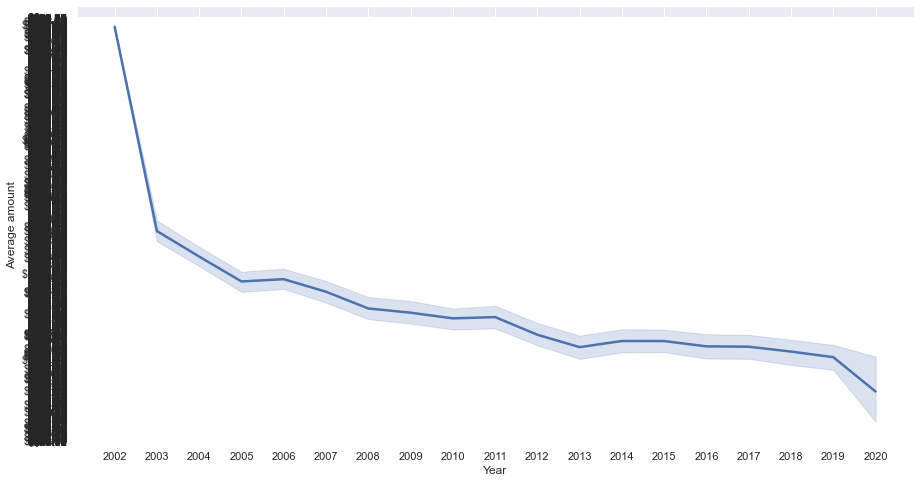

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Year",y="Amount",data=df_cctu0, palette="tab10", linewidth=2.5)
ax.set(xlabel='Year', ylabel='Average amount')
ax.set_xticks(range(2002,2021))

## Questions

###
What is MCC? 
Same Merchant Name but Different Cities/States?
How can we understand negative amounts?